# Analysis on transformed data

## Splitting data by experiment

In [14]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('../../data/raw_post_multi_extract/transformed/objectLevel/labelingInstanceGazeInfo_jun19.csv')

# /Users/jacobrivera/Documents/GitHub/DiLabWork/data/raw_post_multi_extract/transformed/objectLevel/labelingInstanceGazeInfo_jun19.csv



In [102]:
df_185 = df[df['expID'] == 185]
df_186 = df[df['expID'] == 186]
df_187 = df[df['expID'] == 187]
df_188 = df[df['expID'] == 188]

df_185_pre = df_185[df_185['pretrained'] == 1]
df_185_not = df_185[df_185['pretrained'] == 0]

df_186_pre = df_186[df_186['pretrained'] == 1]
df_186_not = df_186[df_186['pretrained'] == 0]

df_187_pre = df_187[df_187['pretrained'] == 1]
df_187_not = df_187[df_187['pretrained'] == 0]

df_188_pre = df_188[df_188['pretrained'] == 1]
df_188_not = df_188[df_188['pretrained'] == 0]

proportion_cols = ['i1_curr_targetProp', 'i2_curr_targetProp', 'i3_curr_targetProp',
                    'i4_curr_targetProp', 'i5_curr_targetProp', 'i6_curr_targetProp']


Index(['subID', 'expID', 'object', 'learned', 'pretrained',
       'i1_curr_targetObj', 'i1_curr_targetProp', 'i1_curr_distObj_1',
       'i1_curr_distProp_1', 'i1_curr_distObj_2', 'i1_curr_distProp_2',
       'i1_curr_distObj_3', 'i1_curr_distProp_3', 'i1_prev_target',
       'i1_prev_dist_1', 'i1_prev_dist_2', 'i1_prev_dist_3',
       'i2_curr_targetObj', 'i2_curr_targetProp', 'i2_curr_distObj_1',
       'i2_curr_distProp_1', 'i2_curr_distObj_2', 'i2_curr_distProp_2',
       'i2_curr_distObj_3', 'i2_curr_distProp_3', 'i2_prev_target',
       'i2_prev_dist_1', 'i2_prev_dist_2', 'i2_prev_dist_3',
       'i3_curr_targetObj', 'i3_curr_targetProp', 'i3_curr_distObj_1',
       'i3_curr_distProp_1', 'i3_curr_distObj_2', 'i3_curr_distProp_2',
       'i3_curr_distObj_3', 'i3_curr_distProp_3', 'i3_prev_target',
       'i3_prev_dist_1', 'i3_prev_dist_2', 'i3_prev_dist_3',
       'i4_curr_targetObj', 'i4_curr_targetProp', 'i4_curr_distObj_1',
       'i4_curr_distProp_1', 'i4_curr_distObj_2', 'i4

In [6]:
'''Index(['subID', 'expID', 'object', 'learned', 'pretrained',
       'i1_curr_targetObj', 'i1_curr_targetProp', 'i1_curr_distObj_1',
       'i1_curr_distProp_1', 'i1_curr_distObj_2', 'i1_curr_distProp_2',
       'i1_curr_distObj_3', 'i1_curr_distProp_3', 'i1_prev_target',
       'i1_prev_dist_1', 'i1_prev_dist_2', 'i1_prev_dist_3',
       'i2_curr_targetObj', 'i2_curr_targetProp', 'i2_curr_distObj_1',
       'i2_curr_distProp_1', 'i2_curr_distObj_2', 'i2_curr_distProp_2',
       'i2_curr_distObj_3', 'i2_curr_distProp_3', 'i2_prev_target',
       'i2_prev_dist_1', 'i2_prev_dist_2', 'i2_prev_dist_3',
       'i3_curr_targetObj', 'i3_curr_targetProp', 'i3_curr_distObj_1',
       'i3_curr_distProp_1', 'i3_curr_distObj_2', 'i3_curr_distProp_2',
       'i3_curr_distObj_3', 'i3_curr_distProp_3', 'i3_prev_target',
       'i3_prev_dist_1', 'i3_prev_dist_2', 'i3_prev_dist_3',
       'i4_curr_targetObj', 'i4_curr_targetProp', 'i4_curr_distObj_1',
       'i4_curr_distProp_1', 'i4_curr_distObj_2', 'i4_curr_distProp_2',
       'i4_curr_distObj_3', 'i4_curr_distProp_3', 'i4_prev_target',
       'i4_prev_dist_1', 'i4_prev_dist_2', 'i4_prev_dist_3',
       'i5_curr_targetObj', 'i5_curr_targetProp', 'i5_curr_distObj_1',
       'i5_curr_distProp_1', 'i5_curr_distObj_2', 'i5_curr_distProp_2',
       'i5_curr_distObj_3', 'i5_curr_distProp_3', 'i5_prev_target',
       'i5_prev_dist_1', 'i5_prev_dist_2', 'i5_prev_dist_3',
       'i6_curr_targetObj', 'i6_curr_targetProp', 'i6_curr_distObj_1',
       'i6_curr_distProp_1', 'i6_curr_distObj_2', 'i6_curr_distProp_2',
       'i6_curr_distObj_3', 'i6_curr_distProp_3', 'i6_prev_target',
       'i6_prev_dist_1', 'i6_prev_dist_2', 'i6_prev_dist_3'],'''

In [8]:
df_188_pre

,subID,expID,object,learned,pretrained,i1_curr_targetObj,i1_curr_targetProp,i1_curr_distObj_1,i1_curr_distProp_1,i1_curr_distObj_2,...,i6_curr_distObj_1,i6_curr_distProp_1,i6_curr_distObj_2,i6_curr_distProp_2,i6_curr_distObj_3,i6_curr_distProp_3,i6_prev_target,i6_prev_dist_1,i6_prev_dist_2,i6_prev_dist_3
3295,18811,188,2,1,1,2,0.68000,10,0.17733,5,...,4,0.27467,9,0.088444,12,0.013778,2,-1,9,12
3296,18811,188,3,1,1,3,0.34711,14,0.50311,6,...,13,0.00000,18,0.000000,10,0.000000,3,8,18,10
3299,18811,188,6,1,1,6,0.28711,4,0.53778,3,...,10,0.23556,8,0.221330,16,0.124890,6,10,-1,16
3300,18811,188,7,1,1,7,0.65644,5,0.19822,2,...,11,0.00000,17,0.000000,8,0.000000,-1,-1,17,-1
3302,18811,188,9,1,1,9,0.49289,16,0.35778,17,...,4,0.29022,2,0.000000,12,0.000000,9,-1,2,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4364,18872,188,9,1,1,9,0.10711,16,0.33244,17,...,2,0.34444,4,0.000000,12,0.000000,-1,-1,-1,12
4366,18872,188,11,1,1,11,0.46044,8,0.29289,16,...,8,0.21378,7,0.209780,17,0.000000,11,7,10,17
4368,18872,188,13,1,1,13,0.16844,18,0.41600,6,...,10,0.49111,3,0.013333,18,0.000000,-1,8,3,18
4370,18872,188,15,1,1,15,0.14178,6,0.35467,3,...,18,0.60889,1,0.000000,11,0.000000,15,18,-1,5


In [9]:
df_188_not

,subID,expID,object,learned,pretrained,i1_curr_targetObj,i1_curr_targetProp,i1_curr_distObj_1,i1_curr_distProp_1,i1_curr_distObj_2,...,i6_curr_distObj_1,i6_curr_distProp_1,i6_curr_distObj_2,i6_curr_distProp_2,i6_curr_distObj_3,i6_curr_distProp_3,i6_prev_target,i6_prev_dist_1,i6_prev_dist_2,i6_prev_dist_3
3294,18811,188,1,1,0,1,0.34578,17,0.63111,9,...,8,0.33778,13,0.168440,7,0.16622,1,14,-1,-1
3297,18811,188,4,1,0,4,0.00000,14,1.00000,6,...,12,0.18978,9,0.105780,2,0.00000,-1,12,9,2
3298,18811,188,5,1,0,5,0.85244,10,0.13689,7,...,12,0.18711,3,0.066667,17,0.00000,5,12,-1,17
3301,18811,188,8,1,0,8,0.51422,16,0.25689,11,...,7,0.14667,11,0.000000,17,0.00000,-1,-1,-1,17
3303,18811,188,10,1,0,10,0.59822,5,0.29600,2,...,18,0.05600,13,0.000000,3,0.00000,10,18,8,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4365,18872,188,10,1,0,10,0.24311,5,0.70444,7,...,13,0.00000,3,0.000000,18,0.00000,-1,8,3,18
4367,18872,188,12,0,0,12,0.18933,6,0.32356,13,...,2,1.00000,4,0.000000,9,0.00000,12,-1,-1,-1
4369,18872,188,14,1,0,14,0.80489,4,0.17822,6,...,11,0.25867,7,0.132440,4,0.00000,14,11,8,4
4371,18872,188,16,1,0,16,0.65556,1,0.16756,17,...,8,0.17511,10,0.019556,6,0.00000,16,8,5,6


In [10]:
def plot_object_subject_target(df, object, experiment, subject, learner_type):
    object_groups = df.groupby('object')
    target_columns = ['subID', 'expID', 'object', 'learned', 'pretrained',
                  'i1_curr_targetProp', 'i2_curr_targetProp', 'i3_curr_targetProp',
                  'i4_curr_targetProp', 'i5_curr_targetProp', 'i6_curr_targetProp']
    target_df_obj = object_groups.get_group(object)[target_columns]

    target_df_obj_exp = target_df_obj[(target_df_obj['expID'] == experiment) & (target_df_obj['subID'] == subject)]

    proportion_cols = ['i1_curr_targetProp', 'i2_curr_targetProp', 'i3_curr_targetProp',
                  'i4_curr_targetProp', 'i5_curr_targetProp', 'i6_curr_targetProp']

    domain = np.array([1, 2, 3, 4, 5, 6]).reshape(-1,1)
    plt.scatter(domain, target_df_obj_exp[proportion_cols], label=subject)

    X = np.array(target_df_obj_exp[proportion_cols].values.flatten().tolist()).reshape(-1, 1)

    reg = LinearRegression().fit(domain, X)

    y_pred = [reg.predict([[i]]) for i in range(1,7)]
    flatten_y_pred = [j for sub in y_pred for j in sub]

    plt.plot(domain, flatten_y_pred, label='regression')
    plt.xlabel('instance')
    plt.ylabel('gaze proportion')
    plt.title('{level} learners: target obj {obj} gaze prop per labeling instances'.format(level=learner_type,obj=object))
    plt.legend()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


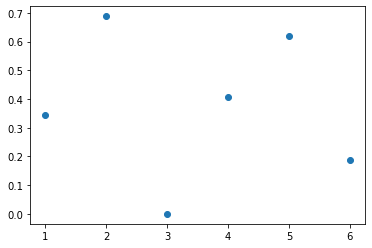

LEARNED
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


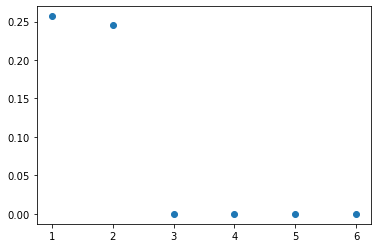

NOT LEARNED
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


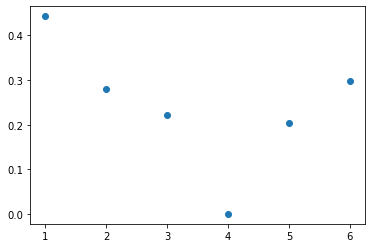

NOT LEARNED
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


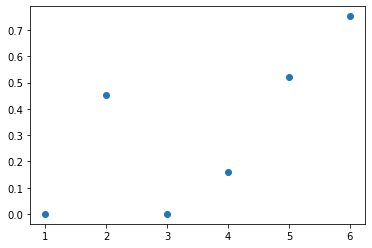

LEARNED
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


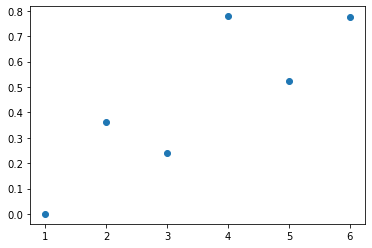

LEARNED
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


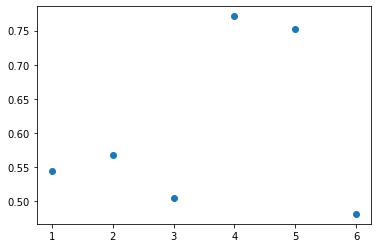

LEARNED
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


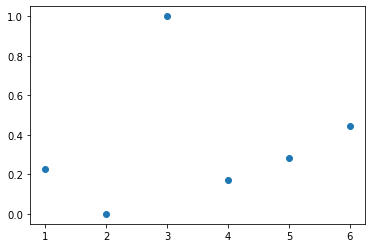

LEARNED
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


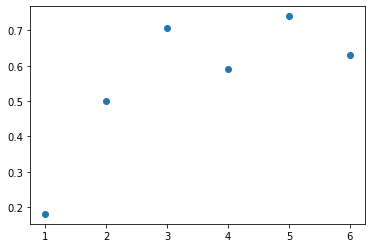

LEARNED
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


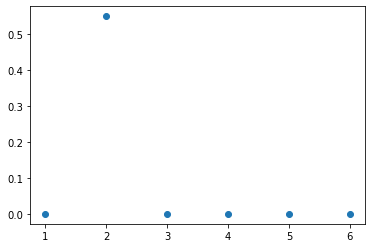

LEARNED
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


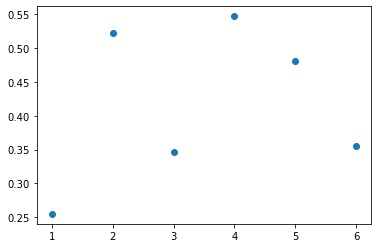

LEARNED
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


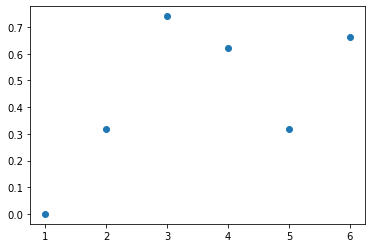

LEARNED
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


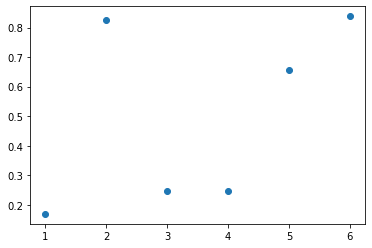

LEARNED
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


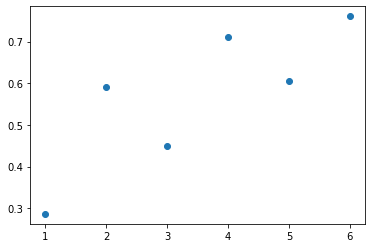

LEARNED
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


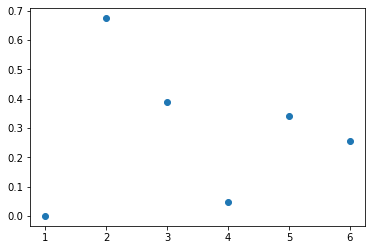

LEARNED
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


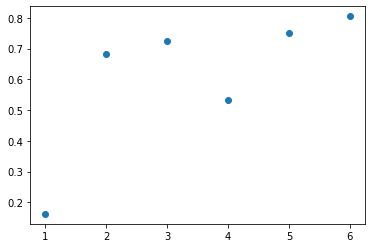

LEARNED
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


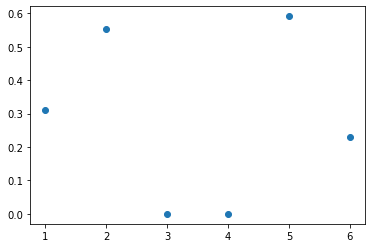

NOT LEARNED
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


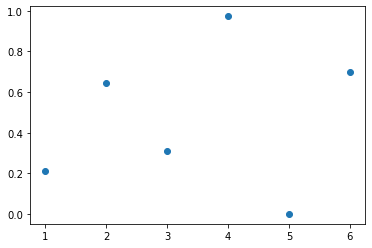

LEARNED
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


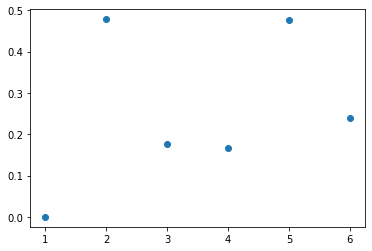

LEARNED
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


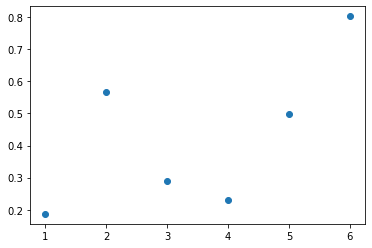

LEARNED
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


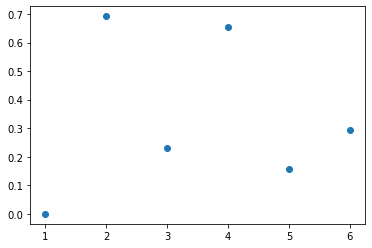

LEARNED
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


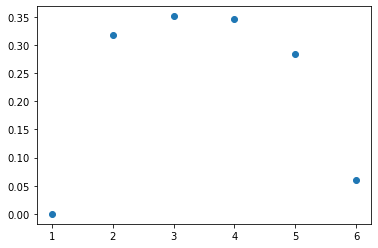

LEARNED
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


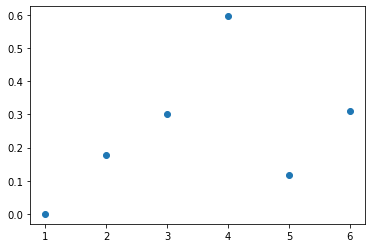

LEARNED
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


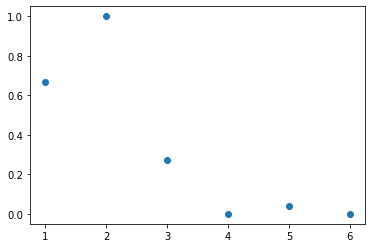

LEARNED
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


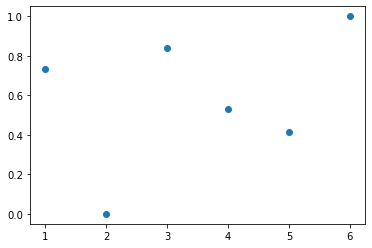

LEARNED
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


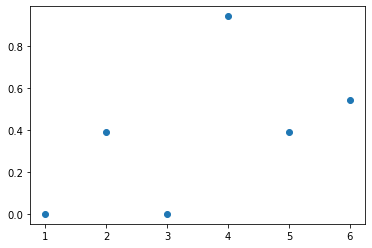

NOT LEARNED
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


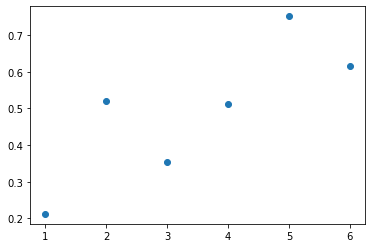

LEARNED
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


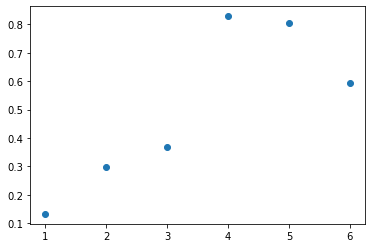

LEARNED
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


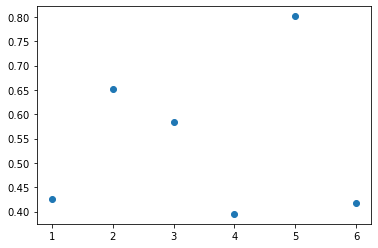

LEARNED
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


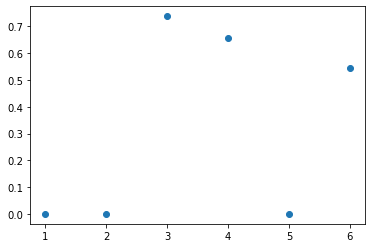

LEARNED
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


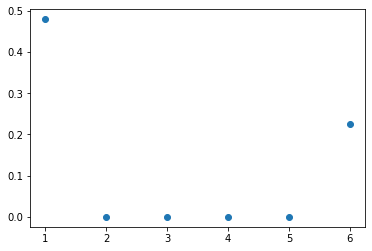

NOT LEARNED
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


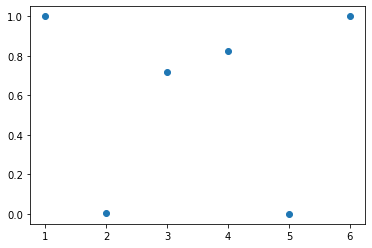

NOT LEARNED
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


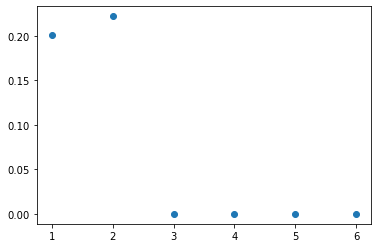

LEARNED
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


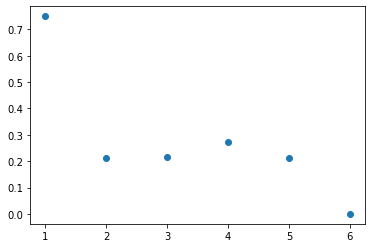

NOT LEARNED
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


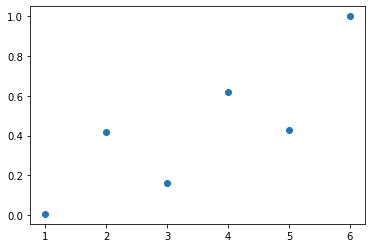

LEARNED
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


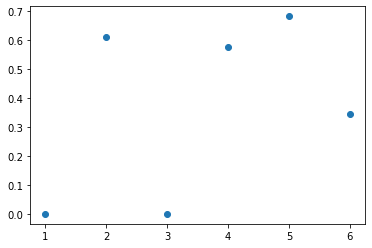

LEARNED
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


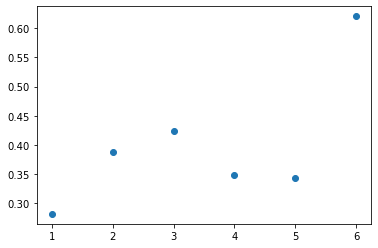

LEARNED
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


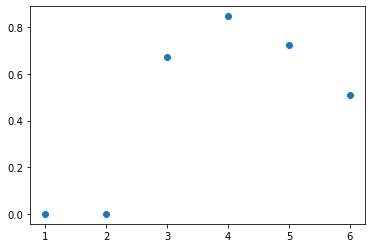

LEARNED
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


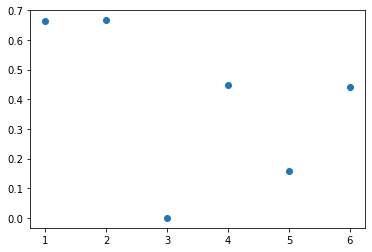

LEARNED
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


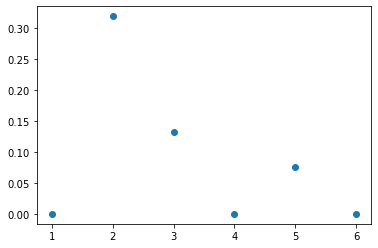

NOT LEARNED
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


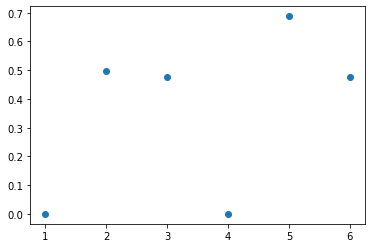

LEARNED
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


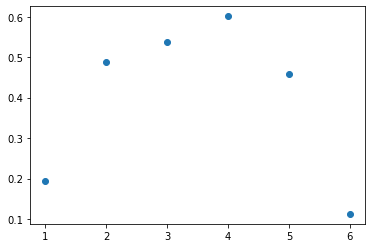

NOT LEARNED
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


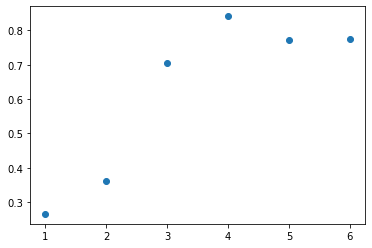

LEARNED
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


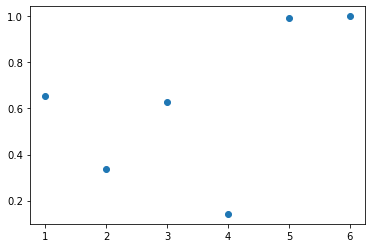

LEARNED
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


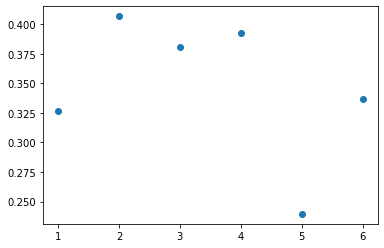

LEARNED
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


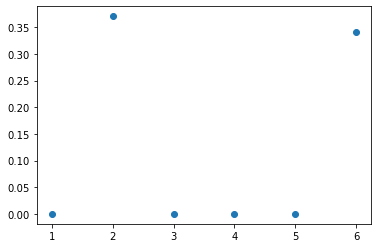

LEARNED
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


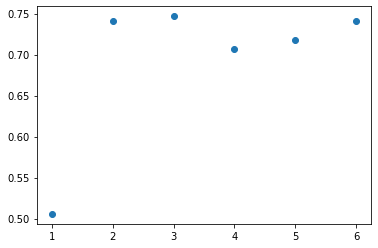

LEARNED
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


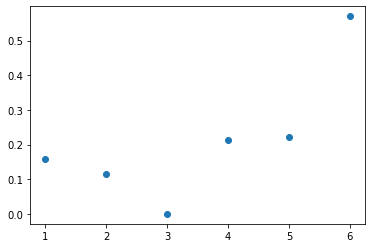

LEARNED
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


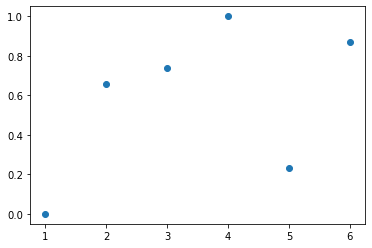

LEARNED
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


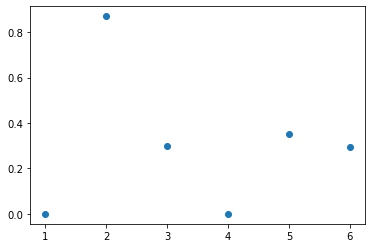

LEARNED
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


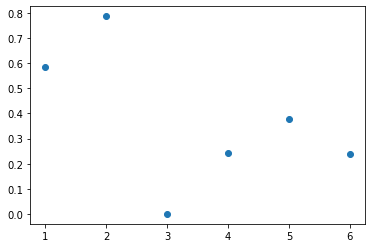

LEARNED
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


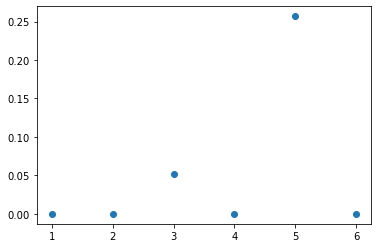

LEARNED
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


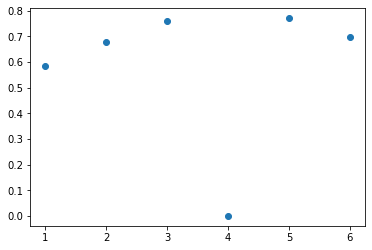

LEARNED
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


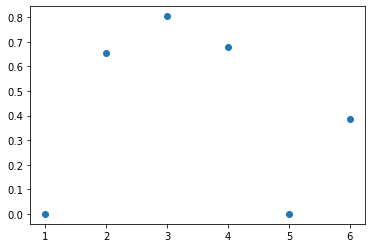

LEARNED
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


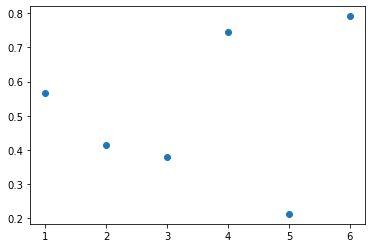

LEARNED
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


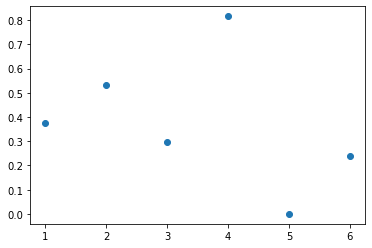

NOT LEARNED
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


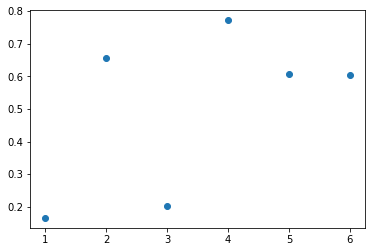

LEARNED
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


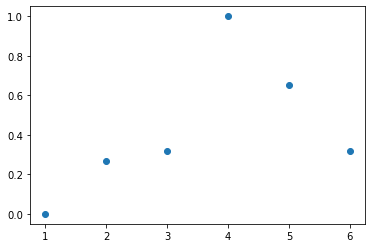

LEARNED
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


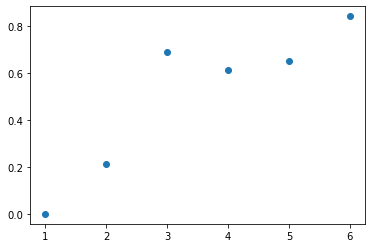

LEARNED
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


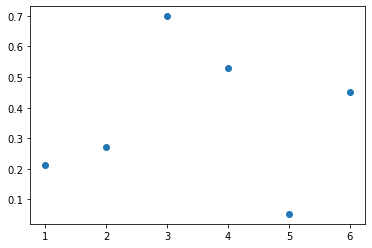

LEARNED
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


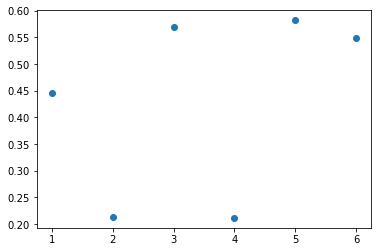

LEARNED
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


In [49]:

def grapher(df, obj):
    proportion_cols = ['i1_curr_targetProp', 'i2_curr_targetProp', 'i3_curr_targetProp',
                    'i4_curr_targetProp', 'i5_curr_targetProp', 'i6_curr_targetProp']
    domain = np.array([1, 2, 3, 4, 5, 6]).reshape(-1,1)

    for sub in df['subID'].unique():
        print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
        plt.scatter(domain, df[(df['object'] == obj) & (df['subID'] == sub)][proportion_cols])
        plt.show()

        if (df[(df['object'] == obj) & (df['subID'] == sub)]['learned'].values == 1):
            print("LEARNED")
        else:
            print("NOT LEARNED")
        print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")

grapher(df_188_not, 1)


In [26]:
df_188_pre[df_188_pre['object'] == 2][proportion_cols]
print()

In [44]:
df_188_pre[(df_188_pre['object'] == 2) & (df_188_pre['subID'] == sub)]['learned'].values == 1

array([ True])

In [43]:
if (df_188_pre[(df_188_pre['object'] == 2) & (df_188_pre['subID'] == sub)]['learned'].values == 1):
    print("LEARNED")
else:
    print("NOT LEARNED")

LEARNED


In [72]:
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split



X = df_188_pre[proportion_cols]
y = df_188_pre['pretrained']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = svm.SVC()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_pred=y_pred, y_true=y_test))

ValueError: The number of classes has to be greater than one; got 1 class

In [73]:
X = df_188_not[proportion_cols]
y = df_188_not['pretrained']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = svm.SVC()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_pred=y_pred, y_true=y_test))

ValueError: The number of classes has to be greater than one; got 1 class

In [86]:
X = df_188_pre[proportion_cols]
y = df_188_pre['learned']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = svm.SVC()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_pred=y_pred, y_true=y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.95      1.00      0.98       103

    accuracy                           0.95       108
   macro avg       0.48      0.50      0.49       108
weighted avg       0.91      0.95      0.93       108



/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [88]:
df_188[df_188['learned'] == 0]

,subID,expID,object,learned,pretrained,i1_curr_targetObj,i1_curr_targetProp,i1_curr_distObj_1,i1_curr_distProp_1,i1_curr_distObj_2,...,i6_curr_distObj_1,i6_curr_distProp_1,i6_curr_distObj_2,i6_curr_distProp_2,i6_curr_distObj_3,i6_curr_distProp_3,i6_prev_target,i6_prev_dist_1,i6_prev_dist_2,i6_prev_dist_3
3312,18812,188,1,0,0,1,0.25689,16,0.44844,17,...,7,0.00000,8,0.00000,13,0.00000,-1,-1,-1,-1
3317,18812,188,6,0,1,6,0.21156,4,0.75378,3,...,16,0.00000,10,0.00000,8,0.00000,-1,-1,-1,-1
3324,18812,188,13,0,1,13,0.31911,12,0.22711,6,...,3,0.00000,18,0.00000,10,0.00000,-1,-1,-1,-1
3328,18812,188,17,0,0,17,0.32889,1,0.32800,16,...,11,0.00000,7,0.00000,8,0.00000,-1,-1,-1,-1
3330,18813,188,1,0,0,1,0.44311,16,0.40578,17,...,13,0.28356,7,0.19511,8,0.17733,-1,13,7,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4345,18871,188,8,0,0,8,0.50133,2,0.21156,16,...,11,0.00000,17,0.00000,7,0.00000,-1,11,-1,-1
4347,18871,188,10,0,0,10,0.34178,5,0.45511,2,...,18,0.14044,13,0.13289,3,0.00000,-1,18,-1,-1
4349,18871,188,12,0,0,12,0.25689,6,0.38800,18,...,2,0.00000,4,0.00000,9,0.00000,-1,2,4,9
4354,18871,188,17,0,0,17,0.17378,16,0.35422,1,...,11,0.29733,7,0.00000,8,0.00000,-1,11,-1,-1


In [101]:
# df[df['pretrained'] == 0]

# X = df[df['pretrained'] == 0][proportion_cols]
# y = df[df['pretrained'] == 0]['learned']

X = df[proportion_cols]
y = df['pretrained']

X = df[df['']][proportion_cols]
y = df['pretrained']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = svm.SVC(kernel="rbf")
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_pred=y_pred, y_true=y_test))

              precision    recall  f1-score   support

           0       0.77      0.99      0.86       666
           1       0.54      0.03      0.06       209

    accuracy                           0.76       875
   macro avg       0.65      0.51      0.46       875
weighted avg       0.71      0.76      0.67       875



3285

In [137]:
prop_cols = [
        'i1_curr_targetProp', 'i1_curr_distProp_1',  'i1_curr_distProp_2' ,'i1_curr_distProp_3',
        'i1_prev_target', 'i1_prev_dist_1', 'i1_prev_dist_2', 'i1_prev_dist_3',
        'i2_curr_targetProp', 'i2_curr_distProp_1', 'i2_curr_distProp_2', 'i2_curr_distProp_3',
        'i2_prev_target', 'i2_prev_dist_1', 'i2_prev_dist_2', 'i2_prev_dist_3',
        'i3_curr_targetProp', 'i3_curr_distProp_1',  'i3_curr_distProp_2', 'i3_curr_distProp_3',
        'i3_prev_target', 'i3_prev_dist_1', 'i3_prev_dist_2', 'i3_prev_dist_3',
        'i4_curr_targetProp', 'i4_curr_distProp_1',  'i4_curr_distProp_2',
        'i4_curr_distProp_3', 'i4_prev_target', 'i4_prev_dist_1', 'i4_prev_dist_2', 'i4_prev_dist_3',
        'i5_curr_targetProp', 'i5_curr_distProp_1', 'i5_curr_distProp_2','i5_curr_distProp_3',
        'i5_prev_target', 'i5_prev_dist_1', 'i5_prev_dist_2', 'i5_prev_dist_3',
        'i6_curr_targetProp','i6_curr_distProp_1',  'i6_curr_distProp_2', 'i6_curr_distProp_3',
        'i6_prev_target','i6_prev_dist_1', 'i6_prev_dist_2', 'i6_prev_dist_3']

distractor_cols  = [ 'pretrained',
        'i1_curr_targetProp', 'i1_curr_distProp_1', 'i1_curr_distProp_2', 'i1_curr_distProp_3',
        'i2_curr_targetProp', 'i2_curr_distProp_1', 'i2_curr_distProp_2', 'i2_curr_distProp_3',
        'i3_curr_targetProp', 'i3_curr_distProp_1', 'i3_curr_distProp_2', 'i3_curr_distProp_3',
        'i4_curr_targetProp', 'i4_curr_distProp_1', 'i4_curr_distProp_2', 'i4_curr_distProp_3',
        'i5_curr_targetProp', 'i5_curr_distProp_1', 'i5_curr_distProp_2', 'i5_curr_distProp_3',
        'i6_curr_targetProp', 'i6_curr_distProp_1', 'i6_curr_distProp_2', 'i6_curr_distProp_3',]

In [139]:

df_train = df_185

X = df_train[distractor_cols]
y = df_train['learned']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = svm.SVC(kernel="rbf")
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_pred=y_pred, y_true=y_test))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89       173
           1       0.69      0.23      0.35        47

    accuracy                           0.81       220
   macro avg       0.76      0.60      0.62       220
weighted avg       0.79      0.81      0.78       220

